In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False, mean=True, ignore='', dropna=True):
    columns = [c for c in df.columns if c_filter in c]
    if ignore:
        columns = [c for c in columns if ignore not in c]
    gd = df[columns]
    gd.set_index(df['epoch'], inplace=True)

    if dropna:
        gd = gd.dropna()
    if mean:
        gd = gd.groupby('epoch').mean()
    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd.plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.2f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.2f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

In [1139]:
!scp -r osnielteixeira2@200.20.15.153:~/experiments/2024-10-31-2034 ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/

epoch=419-step=419.ckpt                       100%  341KB   1.2MB/s   00:00    
hparams.yaml                                  100%  220     7.4KB/s   00:00    
metrics.csv                                   100%  162KB   1.2MB/s   00:00    
params.pt                                     100%  495    16.2KB/s   00:00    


In [1140]:
metrics_path = './experiments/2024-10-31-2034/version_0/metrics.csv'
metrics = pd.read_csv(metrics_path)

In [1141]:
# display(metrics, 'mvc', 'MVC Score')

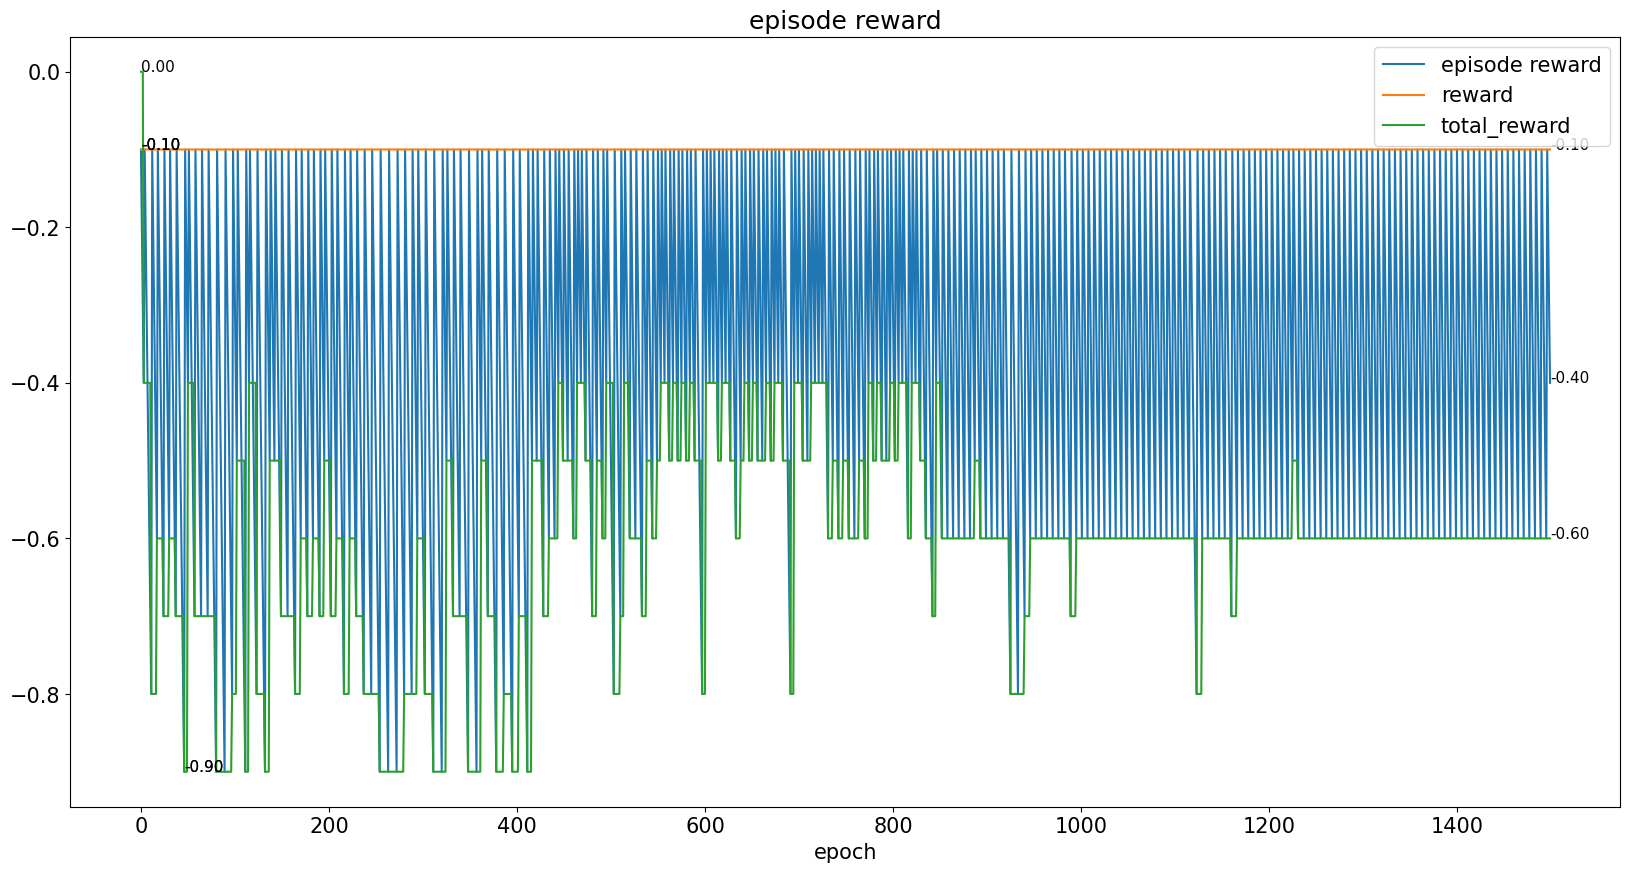

In [1142]:
display(metrics, 'reward', 'episode reward', ignore='val')

In [1143]:
# display(metrics, 'aon', 'All or Nothing')

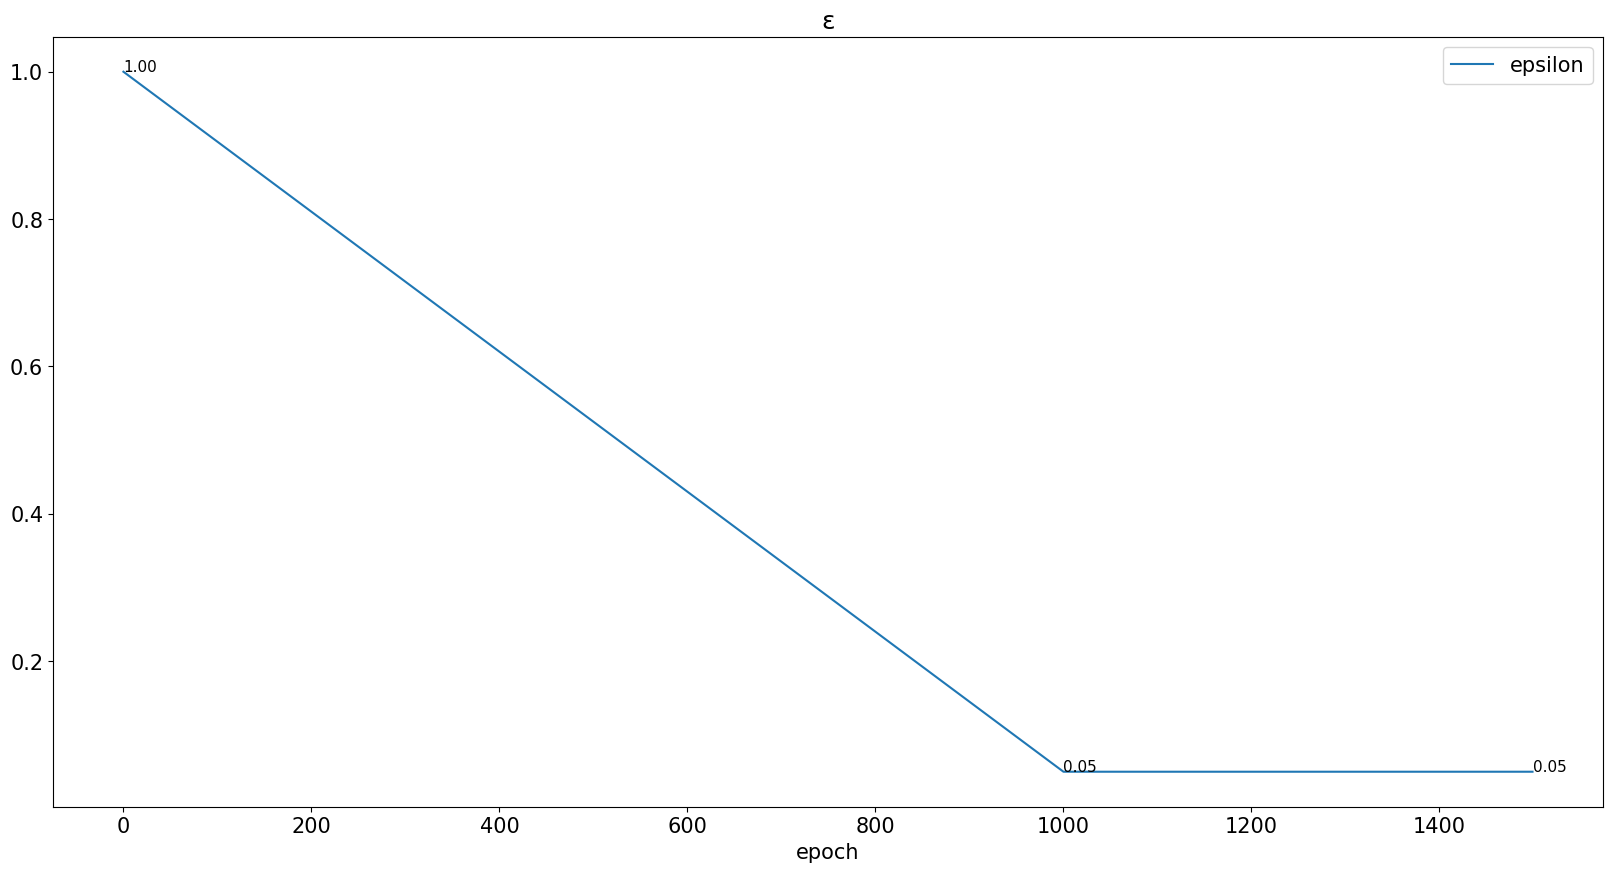

In [1144]:
display(metrics, 'epsilon', 'ε')

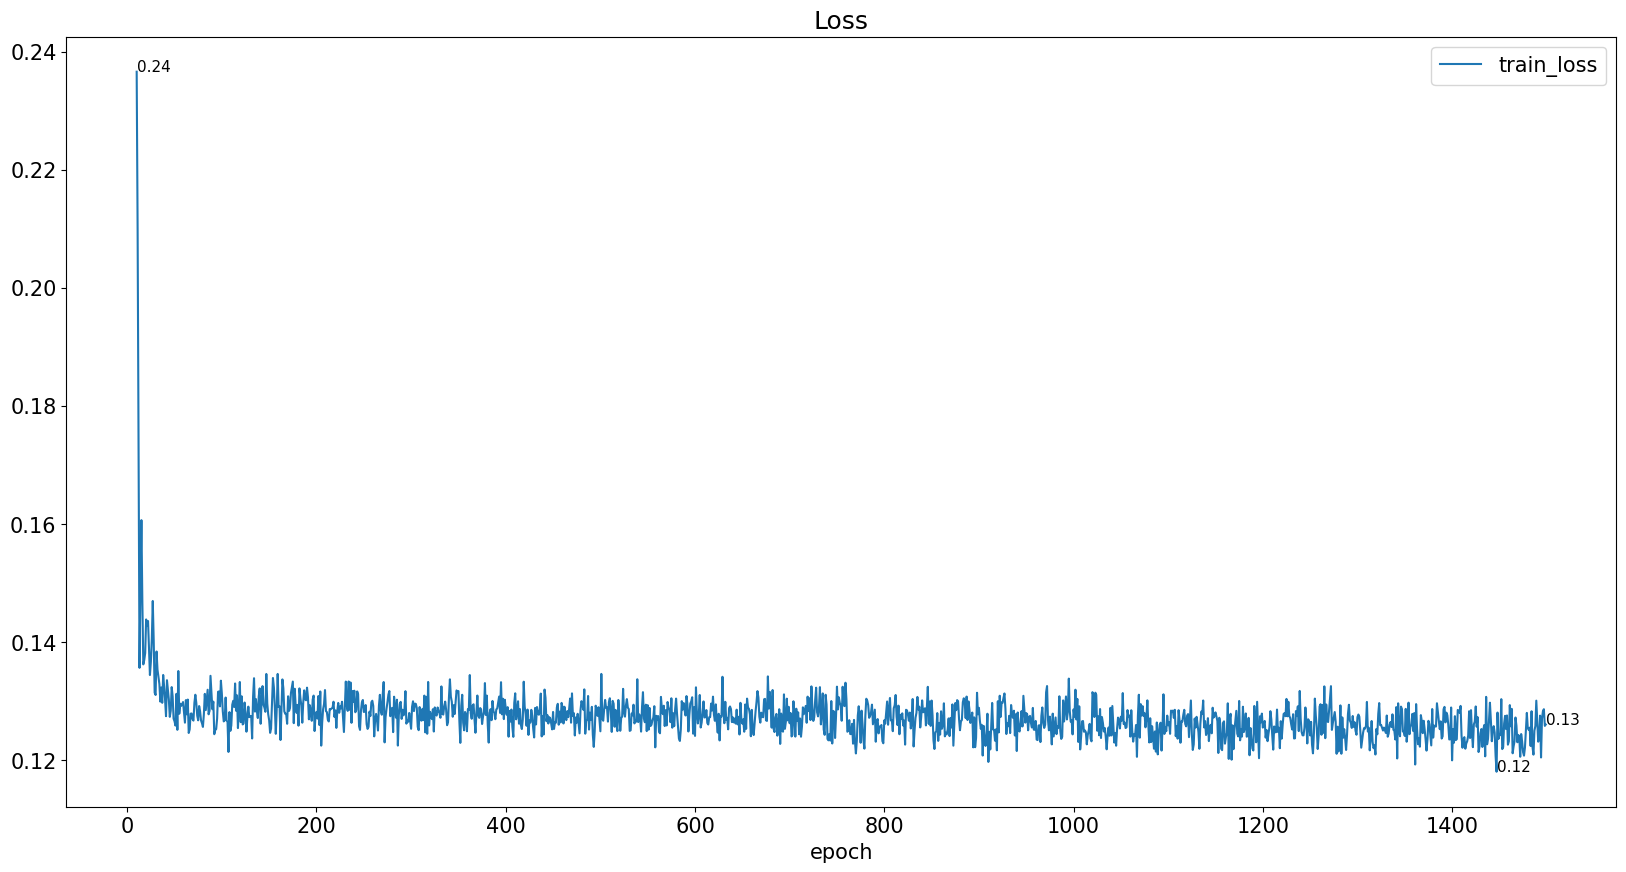

In [1145]:
display(metrics[10:], 'loss', 'Loss')

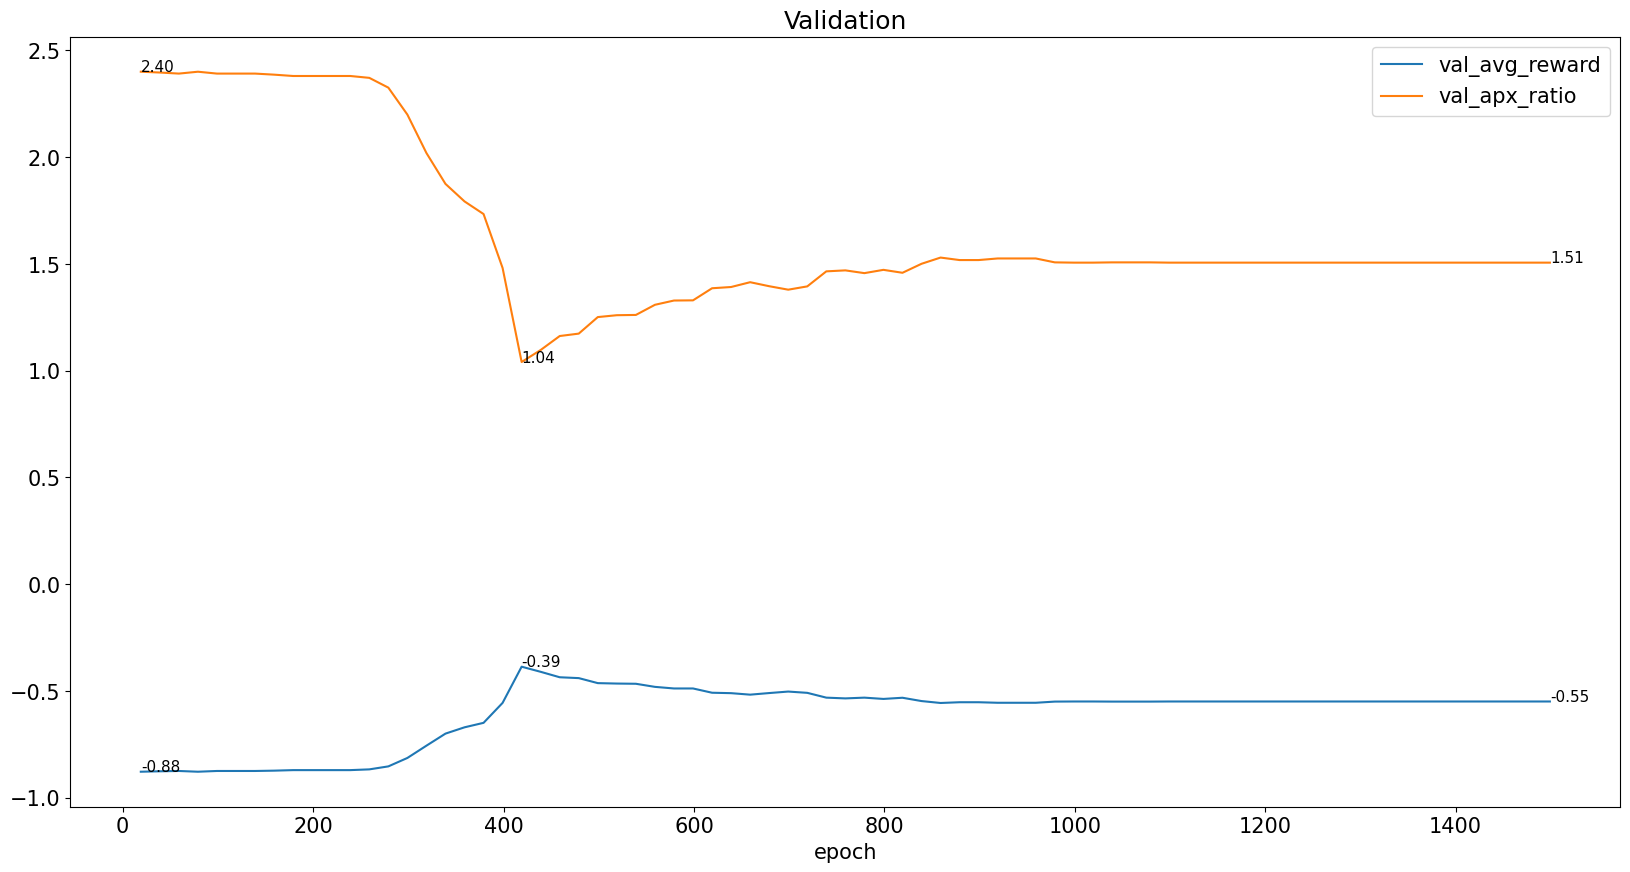

In [1146]:
display(metrics, 'val', 'Validation')

In [1147]:
metrics

,epsilon,episode reward,reward,train_loss,total_reward,epoch,step,val_avg_reward,val_apx_ratio
0,1.00000,-0.1,-0.1,4.226976,0.0,0,0,NaN,NaN
1,0.99905,-0.2,-0.1,0.277016,0.0,1,1,NaN,NaN
2,0.99810,-0.3,-0.1,0.252841,0.0,2,2,NaN,NaN
3,0.99715,-0.4,-0.1,0.275747,-0.4,3,3,NaN,NaN
4,0.99620,-0.1,-0.1,0.274413,-0.4,4,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1570,0.05000,-0.1,-0.1,0.128282,-0.6,1496,1496,NaN,NaN
1571,0.05000,-0.2,-0.1,0.128625,-0.6,1497,1497,NaN,NaN
1572,0.05000,-0.3,-0.1,0.125798,-0.6,1498,1498,NaN,NaN
1573,0.05000,-0.4,-0.1,0.126030,-0.6,1499,1499,NaN,NaN


In [1148]:
# display(metrics, 'apx_ratio_avg', 'apx_ratio_avg')

In [1149]:
# display(metrics, 'train', 'Normalized Train Metrics', normalize=True)

In [1150]:
for ax in axes:
    plt.close(ax.get_figure())